# Hacks for 2.2

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- author: Evan Aparri
- permalink: /unit2/section2hacks

### pathlib
> File paths are different on Windows versus Mac and Linux.  This can cause problems in a project as you work and deploy on different Operating Systems (OS's), pathlib is a solution to this problem. 
- What are commands you use in terminal to access files?
In terminal or command line, you can use the following commands to access files:
  - `cd` (change directory) - to navigate to a different directory/folder
  - `ls` (list) - to list the contents of a directory/folder
  - `pwd` (print working directory) - to display the current directory/folder
  
- What are the command you use in Windows terminal to access files?
In Windows terminal, the commands to access files are similar, but with some differences:

  - `cd` - works the same as in other terminals, but Windows uses backslashes `\` instead of forward slashes `/` to separate directories in file paths
  - `dir` - similar to ls, but displays file and directory information in a different format
  - `chdir` - an alternative to cd in Windows

- What are some of the major differences?
One of the major differences between file paths in Windows versus Linux is the use of forward slashes versus backslashes. In Linux, file paths use forward slashes `/` to separate directories, while Windows uses backslashes `\`. Another difference is that Windows has a different file system than Linux, which can affect how files are accessed and managed. This can cause problems when developing a project that needs to work across different OS's.

Provide what you observed, struggled with, or leaned while playing with this code.
- Why is path a big deal when working with images?
When working with images, the path is important because it tells the program where to find the images on the computer's file system. The path specifies the location of the image file and the program uses this path to load and display the image. It's important to ensure that the path is correct, otherwise, the program will not be able to find the image.

- How does the meta data source and label relate to Unit 5 topics?


- Look up IPython, describe why this is interesting in Jupyter Notebooks for both Pandas and Images?
IPython is an interactive command-line shell for Python. For Jupyter Notebooks, IPython provides a more interactive and user-friendly environment for running Python code. IPython allows for features such as syntax highlighting, tab completion, and history tracking, making it easier to write and debug code. For Pandas, IPython allows for better visualization and exploration of data frames, making it easier to work with large datasets. IPython also provides features such as inline plotting, which can be useful for visualizing data. For images, IPython provides a way to display images inline in Jupyter Notebooks, which can be useful for visualizing and exploring images. This code uses the IPython.display module to display images inline in the notebook.

### base64
> Image formats (JPG, PNG) are often called ***Binary File formats**, it is difficult to pass these over HTTP.   Thus, [base64](https://en.wikipedia.org/wiki/Base64) converts binary encoded data (8-bit, ASCII/Unicode) into a text encoded scheme (24 bits, 6-bit Base64 digits).  Thus base64 is used to transport and embed binary images into textual assets such as HTML and CSS.
- How is Base64 similar or different to Binary and Hexadecimal?
Base64, binary, and hexadecimal are all different systems for encoding and representing data.

Binary encoding uses only two symbols, 0 and 1, to represent all data. It is the most basic and fundamental encoding system, and is used by computers to store and manipulate data.

Hexadecimal encoding uses 16 symbols, 0-9 and A-F, to represent data. It is commonly used in computing to represent binary data in a more compact and human-readable format.

Base64 encoding uses 64 symbols, which consist of 26 uppercase letters, 26 lowercase letters, 10 digits, and 2 symbols (+ and /). It is primarily used for encoding binary data into text format so that it can be transmitted over channels that only support text-based formats, such as email or HTML.

- Translate first 3 letters of your name to Base64.
The first three letters of my name, "Evan", in Base64 encoding are "RXZh".

### io, BytesIO
> Input and Output (I/O) is a fundamental of all Computer Programming. Input/output (I/O) buffering is a technique used to optimize I/O operations.  In large quantities of data, how many frames of input the server currently has queued is the buffer.  In this example, there is a very large picture that lags.
- Where have you been a consumer of buffering?  
I have been a consumer of buffering I watch YouTube or Netflix. For example, while watching a movie on Netflix, the video player might buffer the video data in advance to ensure that there is a continuous stream of data for playback, even if the internet connection is slow or unreliable.

- From your consumer experience, what effects have you experienced from buffering?
I have experienced buffering as a delay or interruption in the video playback, which can be frustrating and may detract from the overall viewing experience. Buffering may also lead to poor video quality, as the video player may have to reduce the resolution or bitrate of the video to keep up with the buffering.

- How do these effects apply to images?
The effects of buffering on images can be similar to those on video. When viewing a large image online, the image data may be buffered in advance to ensure smooth scrolling or zooming. However, if the buffering is slow or interrupted, the image may appear blurry or pixelated, which can detract from the overall viewing experience. Additionally, buffering may take a longer time to display the image initially.

## Data Structures, Imperative Programming Style, and working with Images
> Introduction to creating meta data and manipulating images.  Look at each procedure and explain the the purpose and results of this program.  Add any insights or challenges as you explored this program.
- Does this code seem like a series of steps are being performed?
Yes, the code seems to be a series of steps that aim to prepare a set of images for visualization.

- Describe Grey Scale algorithm in English or Pseudo code?
For each pixel in the image:
  Calculate the average of the RGB values of the pixel.
  Set all three RGB values to the average value.

- Describe scale image?  What is before and after on pixels in three images?
The `scale_image` procedure scales an image to a width of 320 pixels while maintaining the original aspect ratio. The function calculates the scaling percentage required for the new height, scales the image and returns the scaled image.

- Is scale image a type of compression?  If so, line it up with College Board terms described?


Insights and Challenges:
This code showcases the use of the PIL library to manipulate images and the numpy library to convert between data types. The code is well structured and easy to follow. However, I had trouble understanding the details of the algorithms used in the scale_image and image_management_add_html_grey procedures.


## Red Scale

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (320, 240)
-- original image --



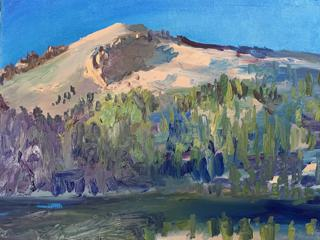

--- red image ----



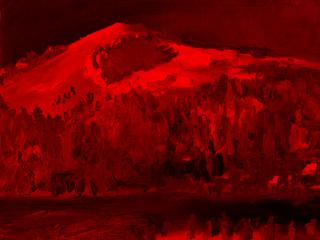

In [7]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
# Create Grey Scale Base64 representation of Image
def image_management_add_html_red(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['red_data'] = [] # key/value for data converted to red scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create red scale of image, set green and blue values to 0 and increase the red value
        red = pixel[0]
        if len(pixel) > 3:
            image['red_data'].append((red, 0, 0, pixel[3])) # PNG format
        else:
            image['red_data'].append((red, 0, 0))
        # end for loop for pixels
        
    img.putdata(image['red_data'])
    image['html_red'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)


# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'])
        print("Scaled size: ", image['scaled_size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- red image ----")
        image_management_add_html_red(image)
        display(HTML(image['html_red'])) 
    print()

## Purple Scale

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (320, 240)
-- original image --



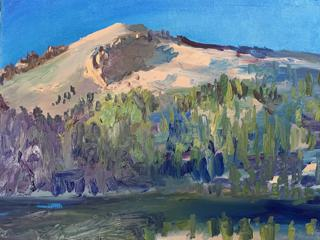

--- red image ----



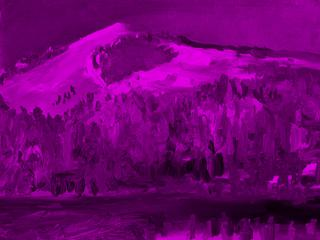

In [8]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
# Create Purple Scale Base64 representation of Image
def image_management_add_html_purple(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['gray_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create purple scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        purple = (red + green) // 2
        image['gray_data'].append((purple, 0, purple))
        # end for loop for pixels
        
    img.putdata(image['gray_data'])
    image['html_purple'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)



# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'])
        print("Scaled size: ", image['scaled_size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- red image ----")
        image_management_add_html_purple(image)
        display(HTML(image['html_purple'])) 
    print()

## College Board Question

![]({{site.baseurl}}/images/2_2MCQ.png)

-- original image --



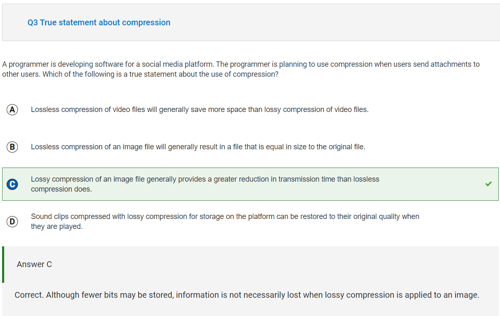

In [12]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "College Board", 'label': "Unit 2.2 Question", 'file': "2_2MCQ.png"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 500
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])


# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("-- original image --")
        display(HTML(image['html'])) 
    print()